In [55]:
!pip install matplotlib


In [56]:
!pip install seaborn


In [57]:
!pip install scikit-learn


In [58]:
!pip install tensorflow


In [59]:
!pip install scipy


In [60]:
!pip install pillow


In [61]:
import PIL
print(PIL.__version__)


12.0.0


In [62]:
import scipy
print("SciPy version:", scipy.__version__)


SciPy version: 1.16.3


In [63]:
import sys
print(sys.version)


3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [64]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "dataset/train"
test_path = "dataset/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 128)      

In [67]:
history = model.fit(
    train_gen,
    epochs=30,
    validation_data=test_gen
)


Epoch 1/30
706/706 [==============================] - 169s 238ms/step - loss: 0.4395 - accuracy: 0.8081 - val_loss: 0.3519 - val_accuracy: 0.8595
Epoch 2/30
706/706 [==============================] - 166s 235ms/step - loss: 0.3888 - accuracy: 0.8351 - val_loss: 0.4106 - val_accuracy: 0.8229
Epoch 3/30
706/706 [==============================] - 149s 211ms/step - loss: 0.3648 - accuracy: 0.8484 - val_loss: 0.3797 - val_accuracy: 0.8361
Epoch 4/30
706/706 [==============================] - 147s 208ms/step - loss: 0.3493 - accuracy: 0.8525 - val_loss: 0.2862 - val_accuracy: 0.8902
Epoch 5/30
706/706 [==============================] - 151s 213ms/step - loss: 0.3373 - accuracy: 0.8611 - val_loss: 0.3124 - val_accuracy: 0.8754
Epoch 6/30
706/706 [==============================] - 147s 208ms/step - loss: 0.3220 - accuracy: 0.8672 - val_loss: 0.2599 - val_accuracy: 0.9077
Epoch 7/30
706/706 [==============================] - 147s 208ms/step - loss: 0.3151 - accuracy: 0.8706 - val_loss: 0.3127 -

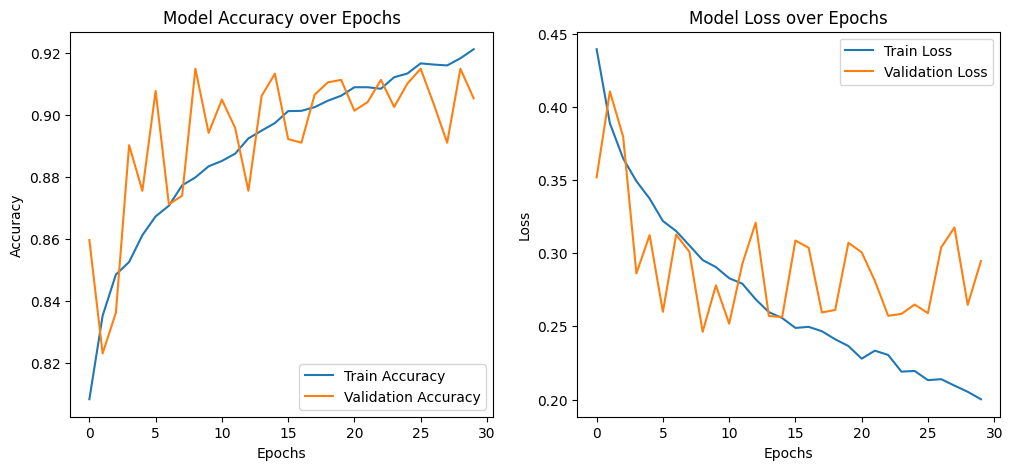

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


79/79 [==============================] - 4s 44ms/step


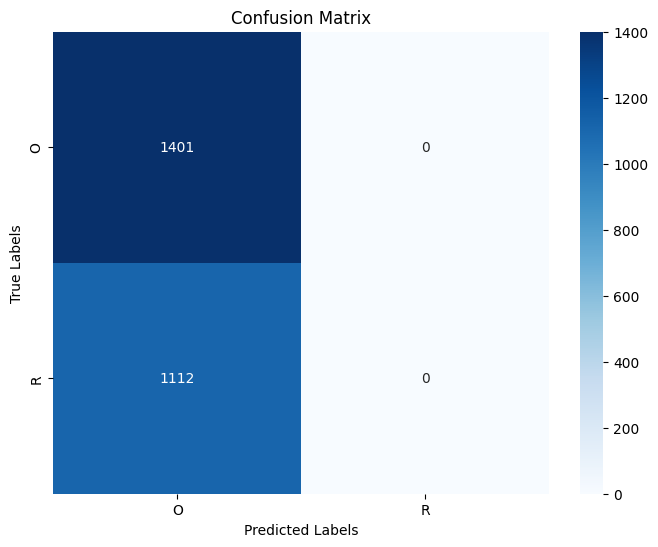

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions
Y_pred = model.predict(test_gen)
y_pred = np.argmax(Y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)
class_labels = list(test_gen.class_indices.keys())

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [70]:
from sklearn.metrics import classification_report
print(classification_report(test_gen.classes, y_pred, target_names=class_labels))


              precision    recall  f1-score   support

           O       0.56      1.00      0.72      1401
           R       0.00      0.00      0.00      1112

    accuracy                           0.56      2513
   macro avg       0.28      0.50      0.36      2513
weighted avg       0.31      0.56      0.40      2513



c:\Users\Mahim\OneDrive\Desktop\5th_sem\Deep_Learning\waste_classification_project\tfenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mahim\OneDrive\Desktop\5th_sem\Deep_Learning\waste_classification_project\tfenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\Mahim\OneDrive\Desktop\5th_sem\Deep_Learning\waste_classification_project\tfenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in lab

1/1 [==============================] - 0s 99ms/step


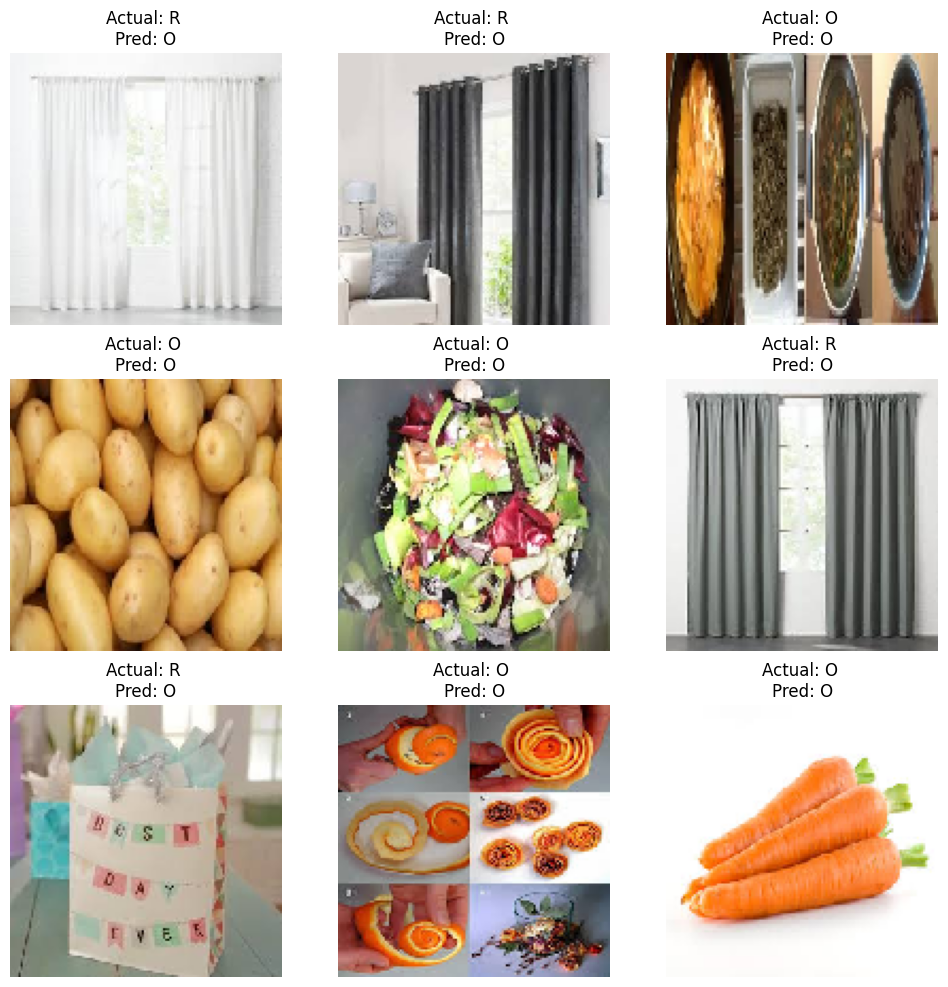

In [71]:
import matplotlib.pyplot as plt
import random

# Get a few random test images
x, y = next(test_gen)
predictions = model.predict(x)
pred_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x[i])
    plt.title(f"Actual: {class_labels[int(y[i])]} \nPred: {class_labels[int(pred_classes[i])]}")
    plt.axis('off')

plt.show()


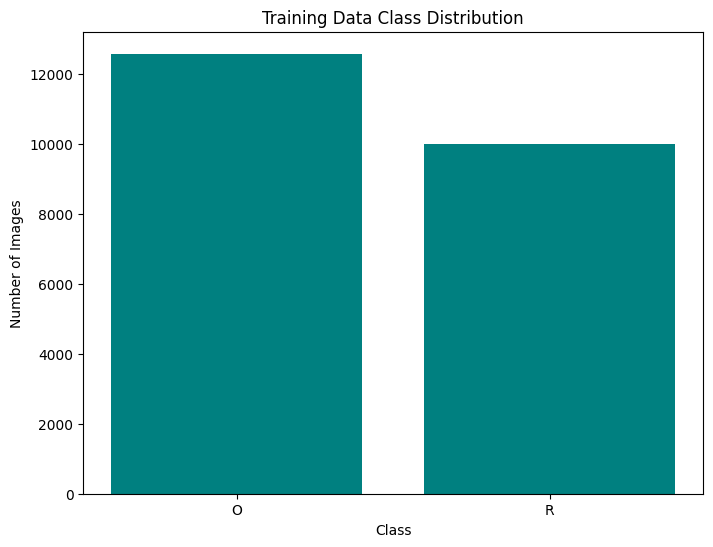

In [72]:
import os
import pandas as pd

categories = os.listdir('dataset/train')
counts = [len(os.listdir(os.path.join('dataset/train', cat))) for cat in categories]

plt.figure(figsize=(8,6))
plt.bar(categories, counts, color='teal')
plt.title('Training Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


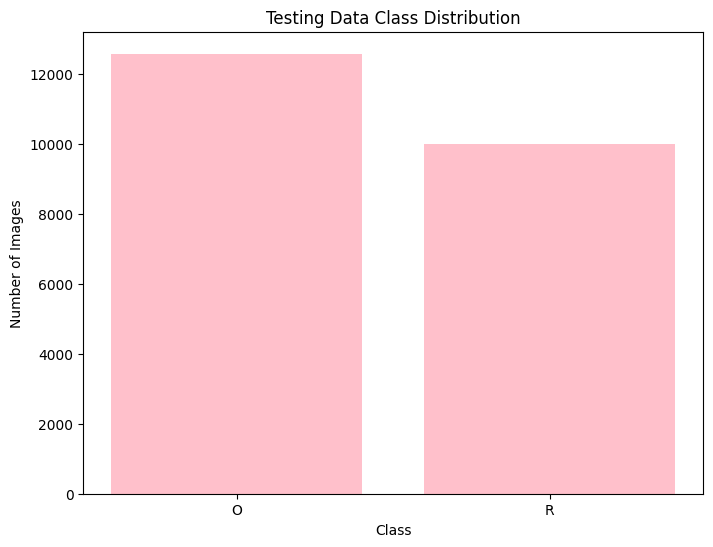

In [73]:
import os
import pandas as pd

categories = os.listdir('dataset/test')
counts = [len(os.listdir(os.path.join('dataset/train', cat))) for cat in categories]

plt.figure(figsize=(8,6))
plt.bar(categories, counts, color='pink')
plt.title('Testing Data Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()